# Instructions


The assignment is at the bottom!

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [2]:
!pip install seaborn

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D # for the legend
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [4]:
bikes.dur.mean()

992.8716543657755

In [5]:
bikes.dur.std()

2073.9809135296514

In [6]:
bikes[bikes.dur>16000].shape

(973, 12)

In [7]:
plt.rcParams['figure.figsize'] = 20, 10

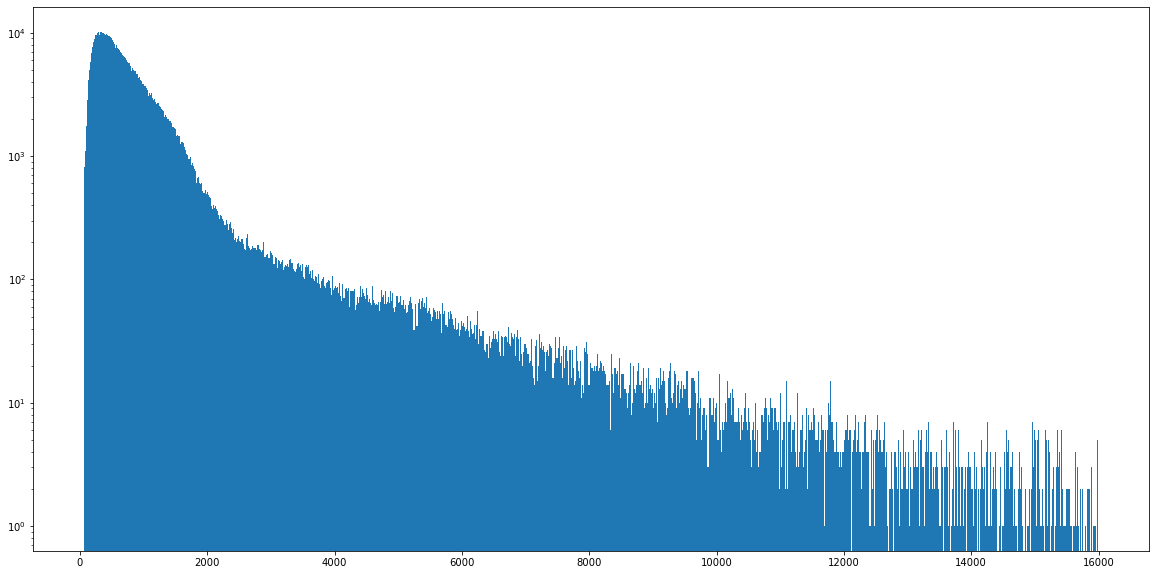

In [8]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [9]:
short = bikes[bikes.dur<16000]

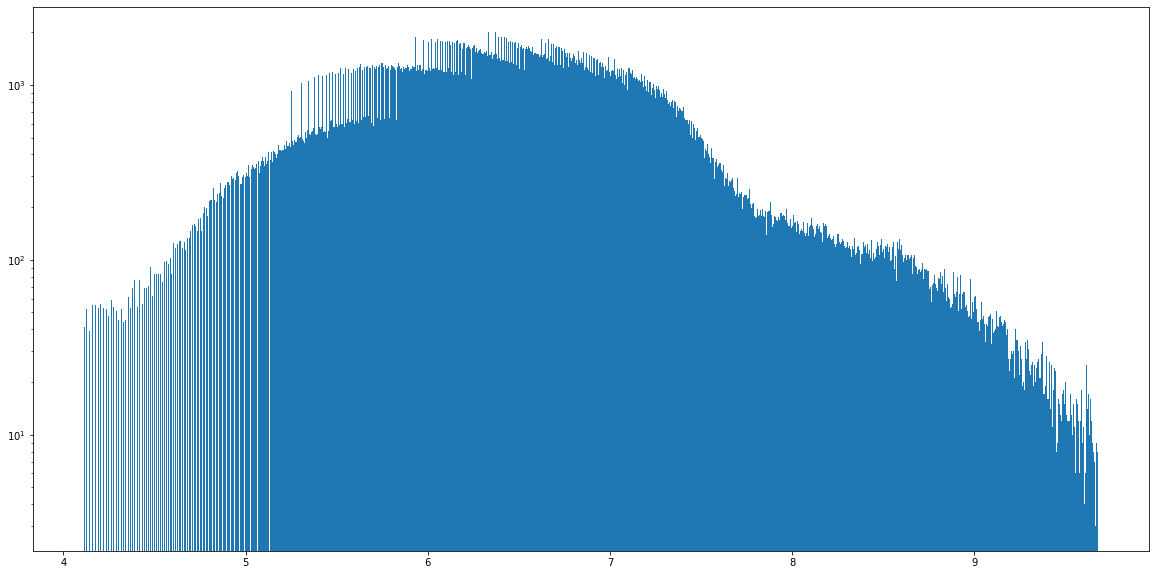

In [10]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

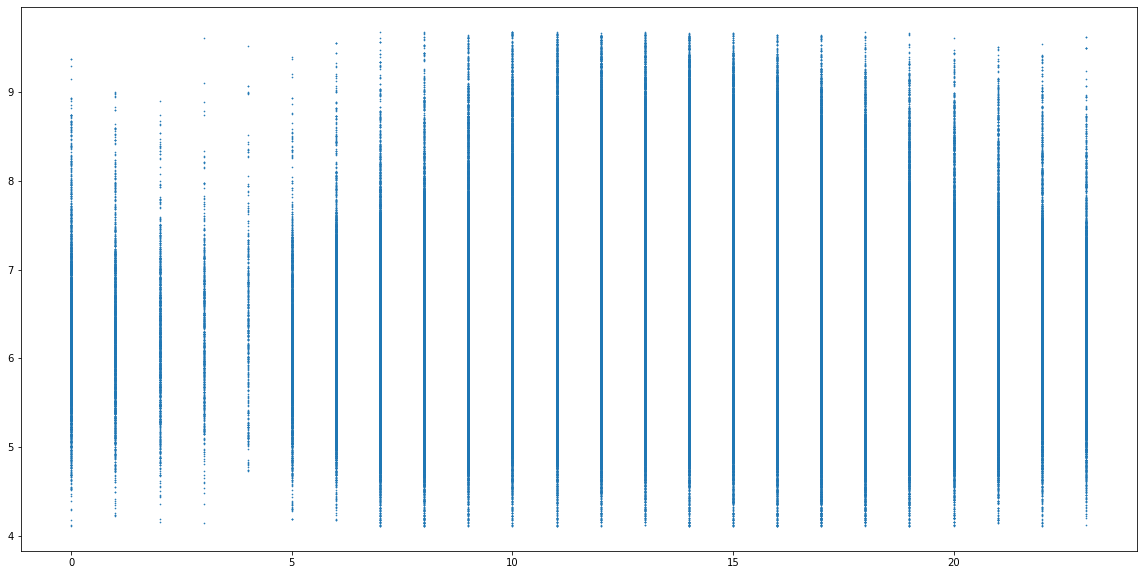

In [11]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [12]:
np.log1p(0), np.log(0)

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_46537/1076539907.py:1: RuntimeWarning: divide by zero encountered in log
  np.log1p(0), np.log(0)


(0.0, -inf)

In [13]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [14]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [15]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [16]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [17]:
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur,log_dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301,5.7
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557,6.3
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555,6.3
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766,6.6
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139,4.9


In [18]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


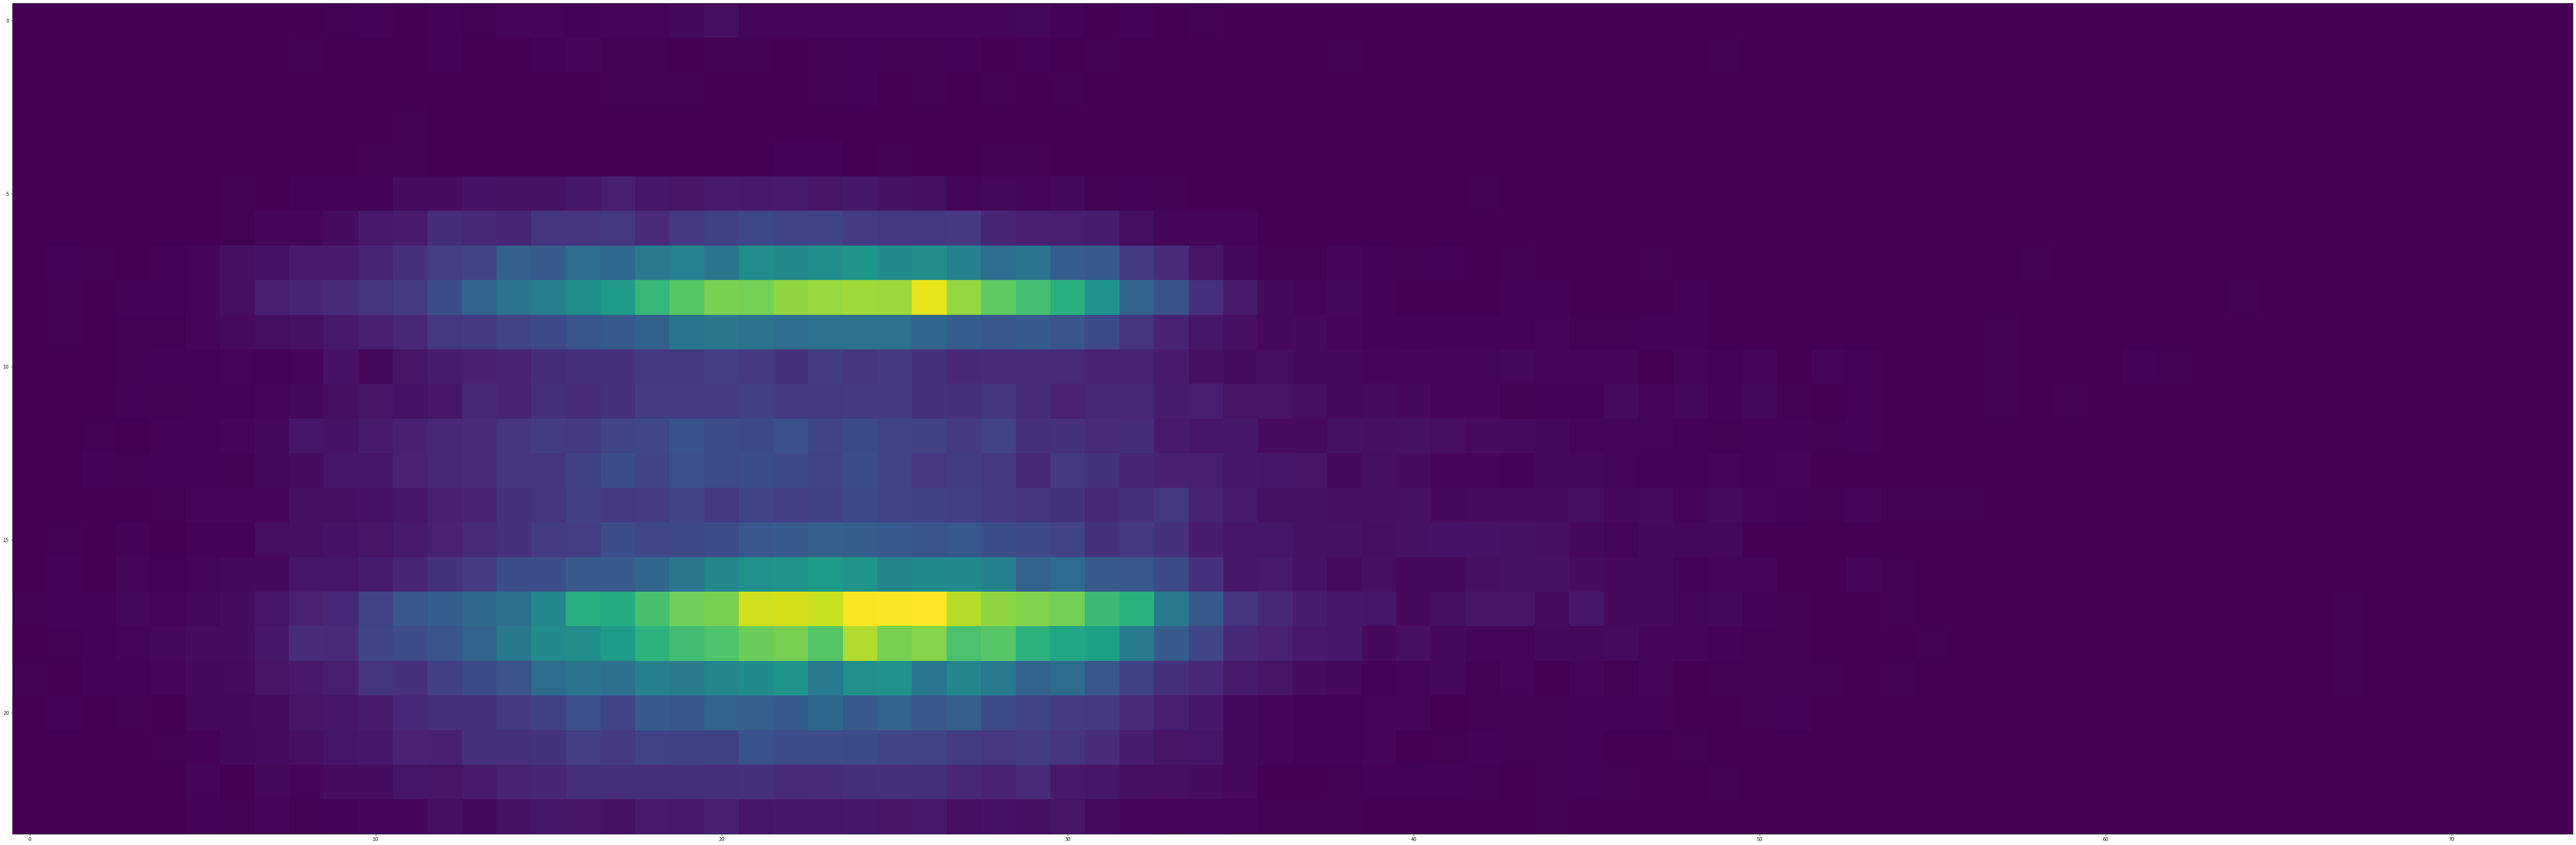

In [19]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

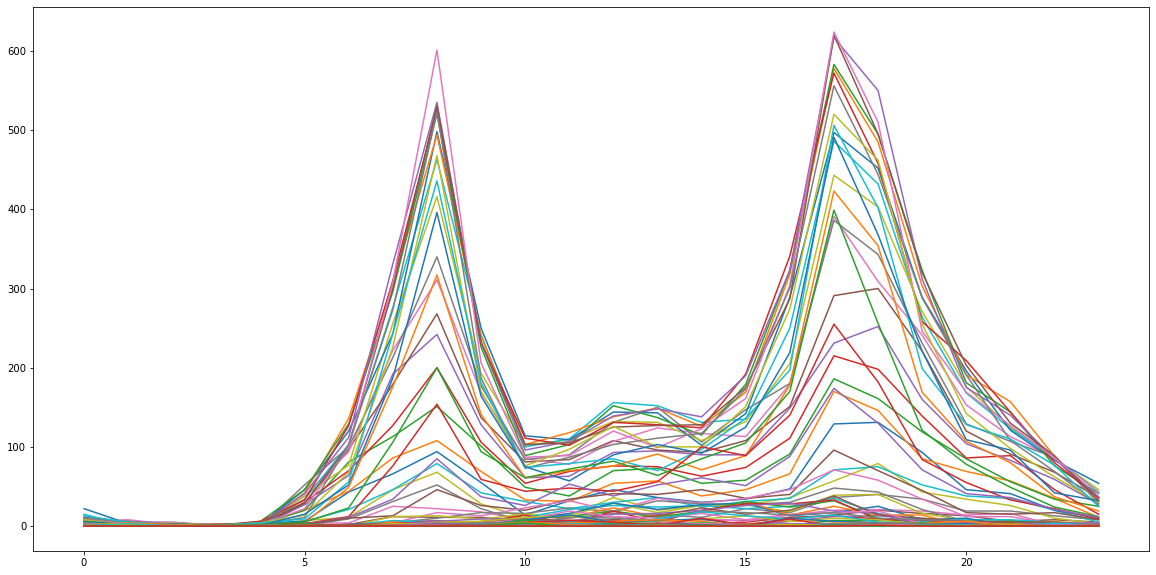

In [20]:
_=plt.plot(duration_hour)

In [21]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [22]:
np.round(.65, 1)

0.6

In [23]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [24]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [25]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

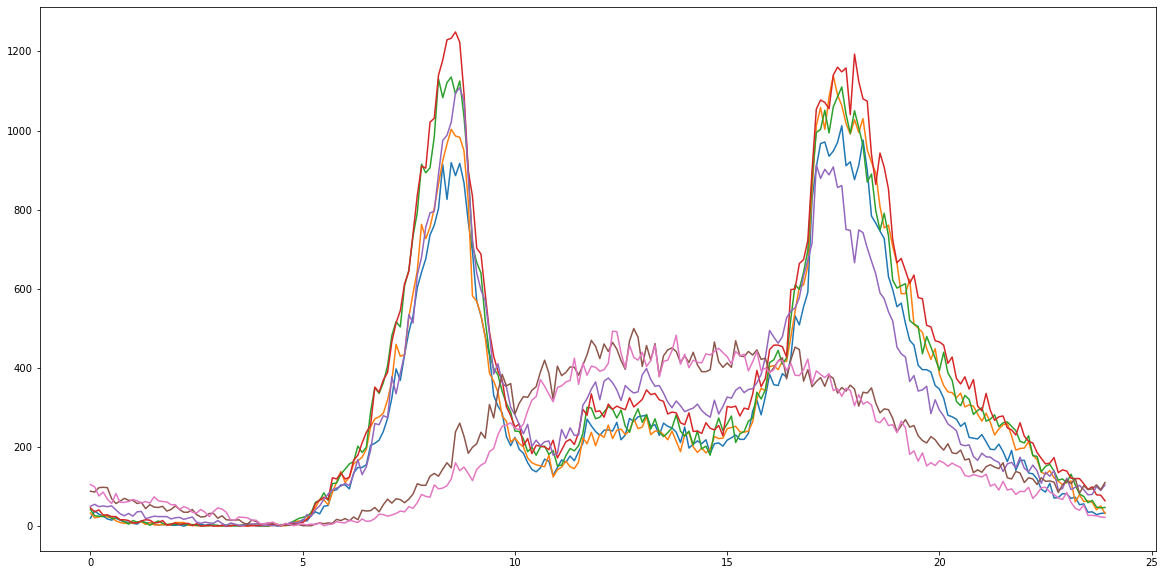

In [26]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(day_hour_count.index, day_hour_count[3])
plt.plot(day_hour_count.index, day_hour_count[4])
plt.plot(day_hour_count.index, day_hour_count[5])
plt.plot(day_hour_count.index, day_hour_count[6])

In [27]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


<AxesSubplot:xlabel='roundhour_of_day'>

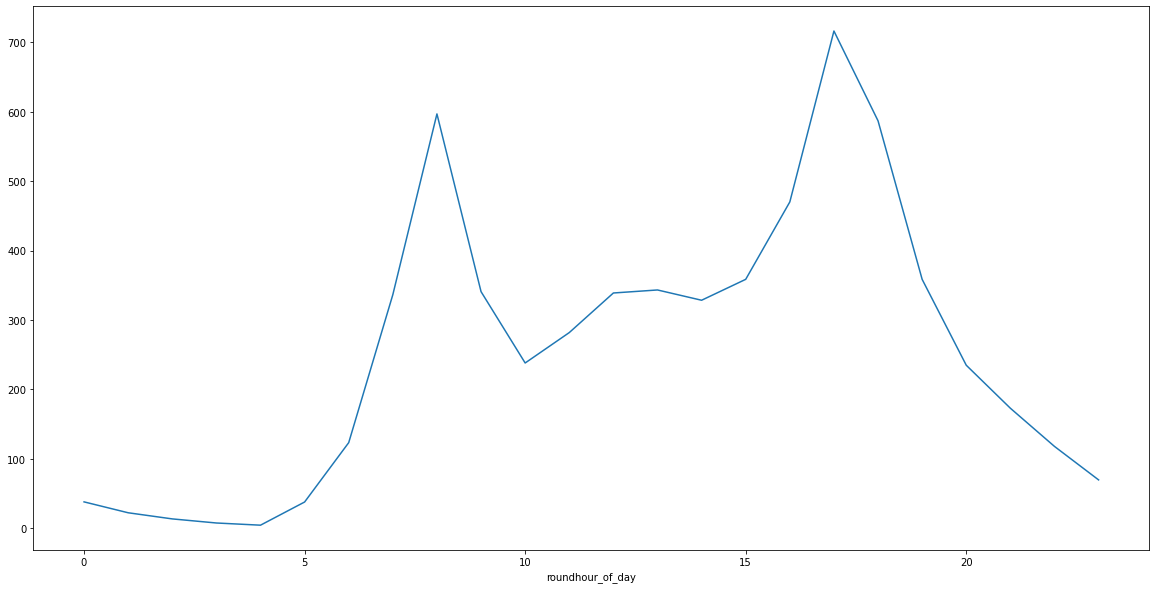

In [28]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [29]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

<AxesSubplot:xlabel='start'>

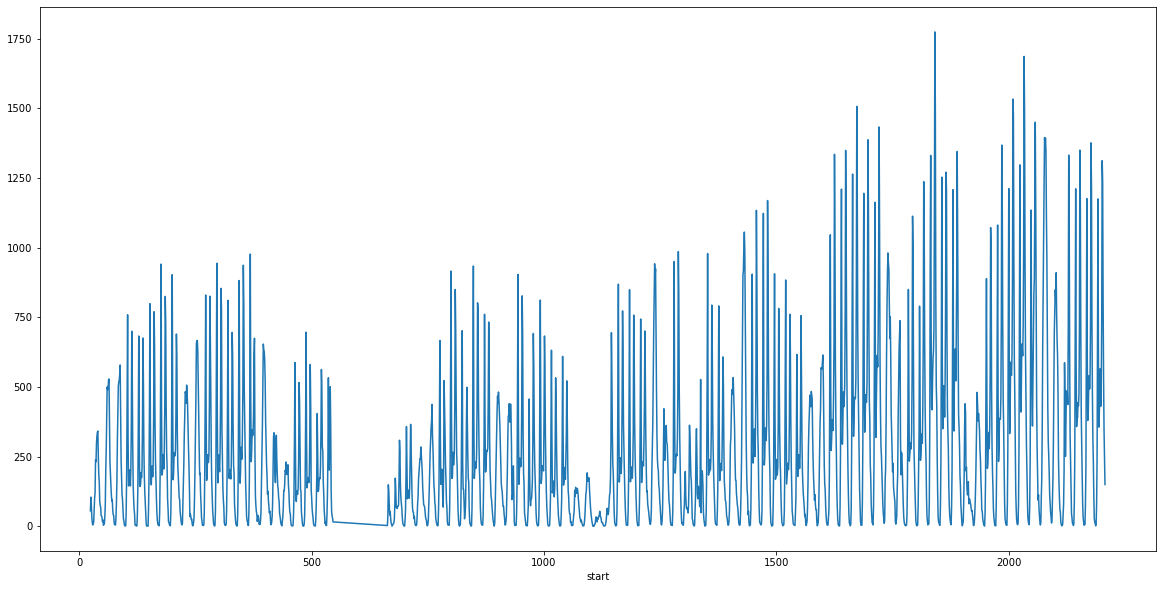

In [30]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [31]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [32]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [33]:
day_hour

Duration (ms)  Start date  End date  Start station number  \
start start                                                              
1     0                 56          56        56                    56   
      1                105         105       105                   105   
      2                 74          74        74                    74   
      3                 32          32        32                    32   
      4                 13          13        13                    13   
...                    ...         ...       ...                   ...   
91    19               806         806       806                   806   
      20               536         536       536                   536   
      21               345         345       345                   345   
      22               240         240       240                   240   
      23               150         150       150                   150   

             Start station  End station number  End station  Bike number  \
start start                                                                
1     0                 56                  56           56           56   
      1                105                 105          105          105   
      2                 74                  74           74           74   
      3                 32                  32           32           32   
      4                 13                  13           13           13   
...                    ...                 ...          ...          ...   
91    19               806                 806          806          806   
      20               536                 536          536          536   
      21               345                 345          345          345   
      22               240                 240          240          240   
      23               150                 150          150          150   

             Member Type  start  end  dur  log_dur  hour_of_day  \
start start                                                       
1     0               56     56   56   56       56           56   
      1              105    105  105  105      105          105   
      2               74     74   74   74       74           74   
      3               32     32   32   32       32           32   
      4               13     13   13   13       13           13   
...                  ...    ...  ...  ...      ...          ...   
91    19             806    806  806  806      806          806   
      20             536    536  536  536      536          536   
      21             345    345  345  345      345          345   
      22             240    240  240  240      240          240   
      23             150    150  150  150      150          150   

             roundhour_of_day  
start start                    
1     0                    56  
      1                   105  
      2                    74  
      3                    32  
      4                    13  
...                       ...  
91    19                  806  
      20                  536  
      21                  345  
      22                  240  
      23                  150  

[2042 rows x 15 columns]

In [34]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


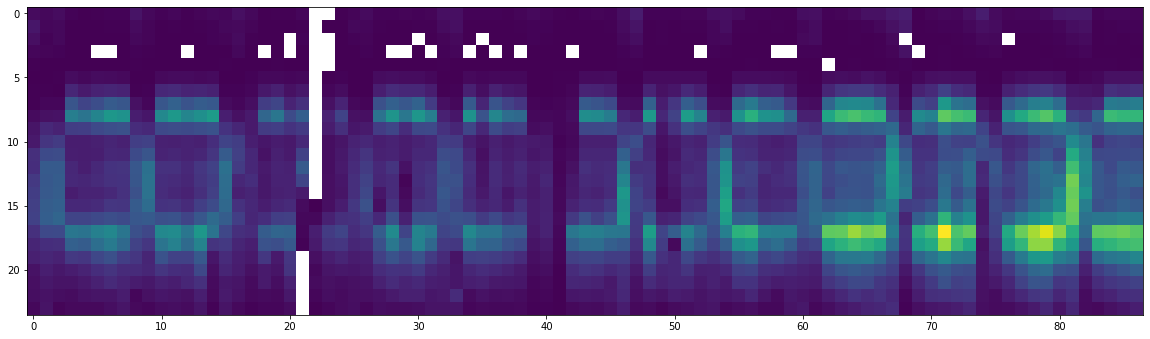

In [35]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

<AxesSubplot:xlabel='start'>

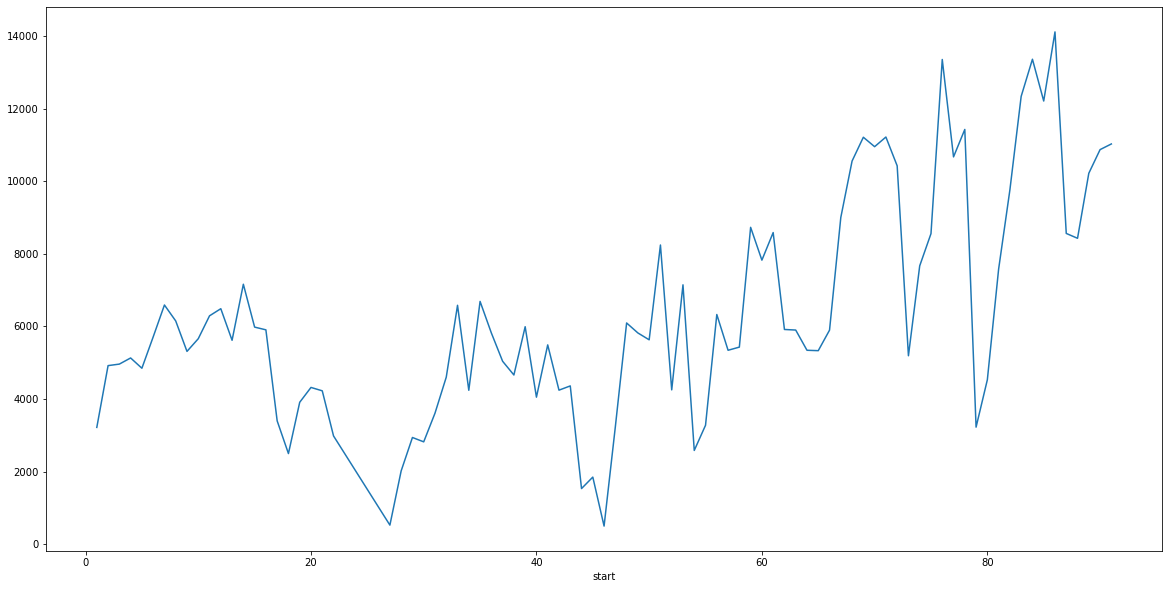

In [36]:
day_count.start.plot()

In [37]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [38]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create two dataframes `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [39]:
monx = np.array(day_hour_count.index)
mony = np.array(day_hour_count[0])


monday = pd.DataFrame(index = day_hour_count.index)
monday['x'] = monx
monday['y'] = mony
monday = monday.dropna()
monday

,x,y
hour_of_day,,
0.0,0.0,21.0
0.1,0.1,39.0
0.2,0.2,31.0
0.3,0.3,26.0
0.4,0.4,19.0
...,...,...
23.5,23.5,36.0
23.6,23.6,37.0
23.7,23.7,30.0


Text(0.5, 0, 'Hour of Day')

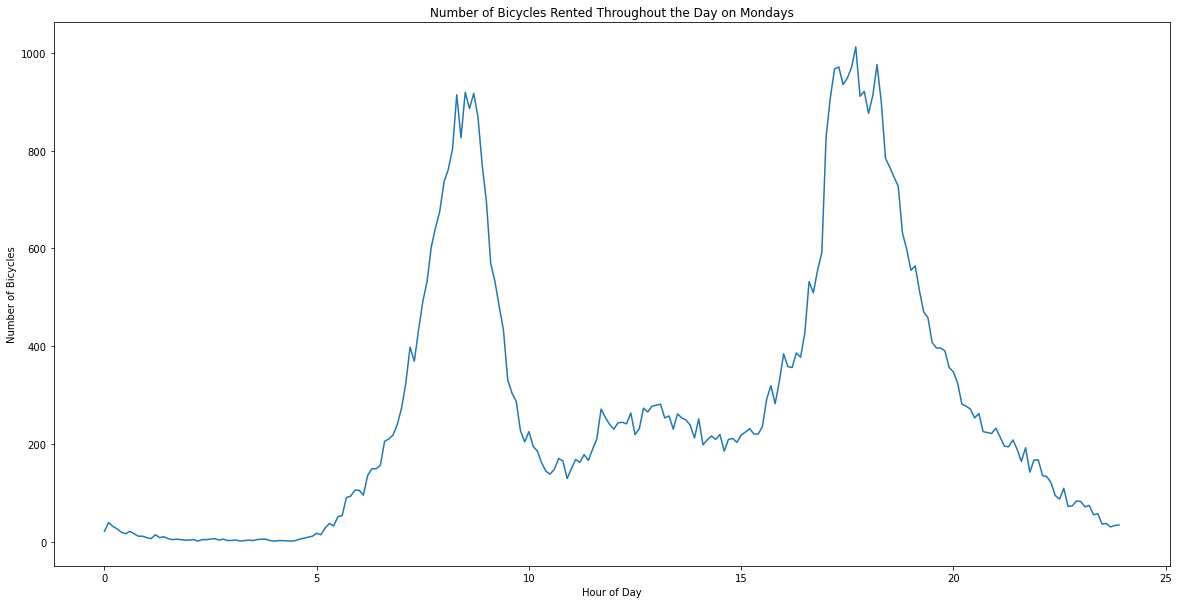

In [124]:
plt.plot(monday.x, monday.y)

plt.title("Number of Bicycles Rented Throughout the Day on Mondays")
plt.ylabel("Number of Bicycles")
plt.xlabel("Hour of Day")

In [41]:
satx = np.array(day_hour_count.index)
saty = np.array(day_hour_count[5])
saturday = pd.DataFrame(index = day_hour_count.index)
saturday['x'] = satx
saturday['y'] = saty
saturday = saturday.dropna()
saturday

,x,y
hour_of_day,,
0.0,0.0,89.0
0.1,0.1,87.0
0.2,0.2,98.0
0.3,0.3,99.0
0.4,0.4,98.0
...,...,...
23.5,23.5,93.0
23.6,23.6,95.0
23.7,23.7,105.0


Text(0.5, 0, 'Hour of Day')

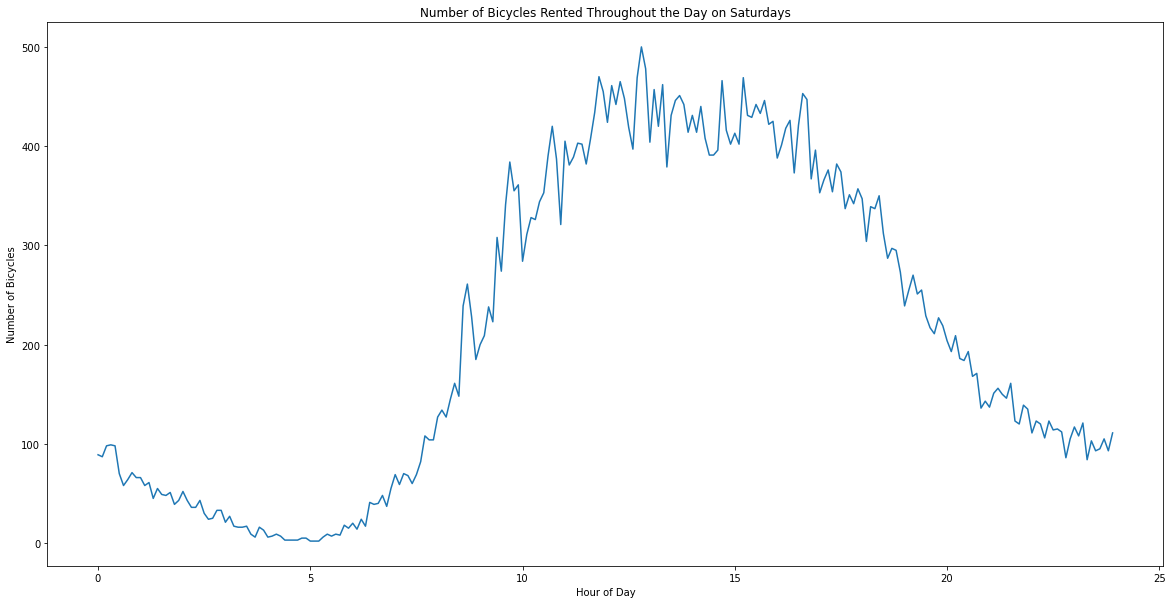

In [122]:
plt.plot(saturday.x, saturday.y)

plt.title("Number of Bicycles Rented Throughout the Day on Saturdays")
plt.ylabel("Number of Bicycles")
plt.xlabel("Hour of Day")


## 2a. Create 3 models fit to `monday.hour_of_day` with varying polynomial degrees ( choose from `n=1,2,3,5,10,15`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [43]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
# 2 degrees
poly2 = PolynomialFeatures(degree=2)

monx2 = poly2.fit_transform(np.reshape(np.array(monday.x),(-1, 1)))

In [45]:
# 5 degrees
poly5 = PolynomialFeatures(degree=5)

monx5 = poly5.fit_transform(np.reshape(np.array(monday.x),(-1, 1)))

In [46]:
# 10 degrees
poly10 = PolynomialFeatures(degree=10)

monx10 = poly10.fit_transform(np.reshape(np.array(monday.x),(-1, 1)))

In [47]:
# 15 degrees
poly15 = PolynomialFeatures(degree=15)

monx15 = poly15.fit_transform(np.reshape(np.array(monday.x),(-1, 1)))

In [48]:
# 2 degree fit 
linear2 = linear_model.LinearRegression()

linear2.fit(monx2, np.array(monday.y))

linear2.coef_, linear2.intercept_

(array([ 0.        , 80.24566954, -2.80782655]), -149.32293022844107)

In [49]:
# 5 degree fit 
linear5 = linear_model.LinearRegression()

linear5.fit(monx5, np.array(monday.y))

linear5.coef_, linear5.intercept_

(array([ 0.00000000e+00, -9.99825847e+01,  4.85090791e+01, -6.10173662e+00,
         3.14117483e-01, -5.74822061e-03]),
 31.648175767747773)

In [50]:
# 10 degree fit 
linear10 = linear_model.LinearRegression()

linear10.fit(monx10, np.array(monday.y))

linear10.coef_, linear10.intercept_

(array([ 0.00000000e+00, -3.24048919e+02,  4.70810601e+02, -2.73122637e+02,
         7.69111911e+01, -1.17684255e+01,  1.04917297e+00, -5.59497191e-02,
         1.75273933e-03, -2.96222709e-05,  2.07198053e-07]),
 68.55402104446995)

In [51]:
# 15 degree fit 
linear15 = linear_model.LinearRegression()

linear15.fit(monx15, np.array(monday.y))

linear15.coef_, linear15.intercept_

(array([ 0.00000000e+00,  1.53444757e-05,  1.02450866e-07,  9.18878394e-07,
         5.82064766e-06,  3.23606899e-05,  1.49921288e-04,  5.16290617e-04,
         9.60038929e-04, -3.94835890e-04,  6.37285705e-05, -5.55534757e-06,
         2.85843240e-07, -8.72013831e-09,  1.46384494e-10, -1.04471195e-12]),
 20.529476600534792)

Text(0.5, 0, 'Hour of Day')

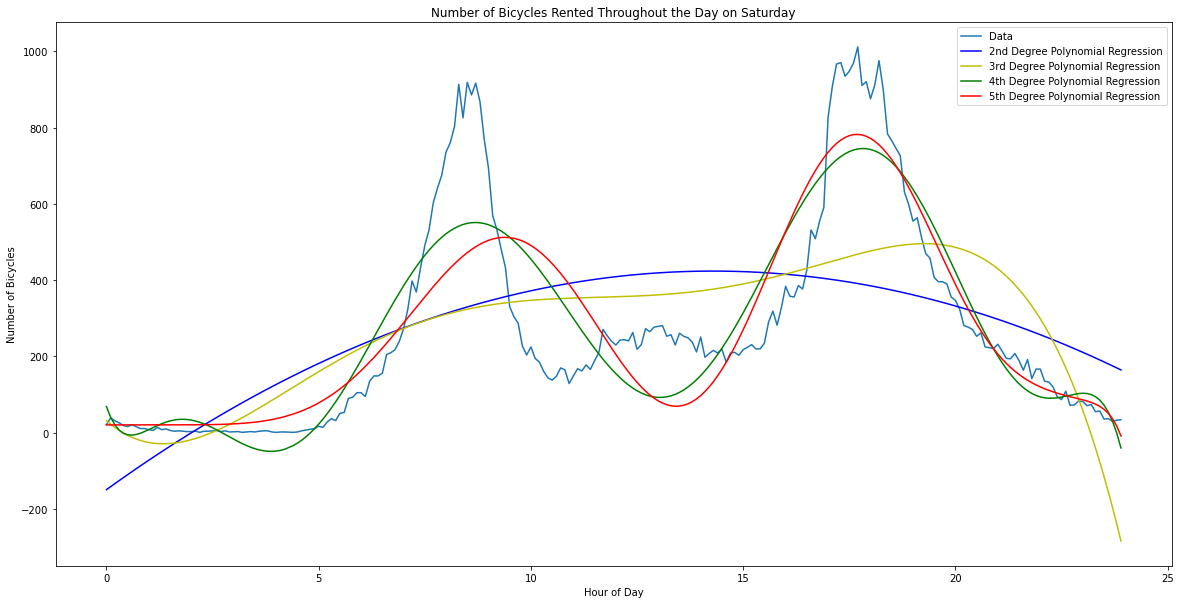

In [120]:
plt.plot(monday.x, monday.y, label = "Data")
plt.plot(monday.x, np.dot(monx2, linear2.coef_) + linear2.intercept_, c='b', label = "2nd Degree Polynomial Regression")
plt.plot(monday.x, np.dot(monx5, linear5.coef_) + linear5.intercept_, c='y', label = "3rd Degree Polynomial Regression")
plt.plot(monday.x, np.dot(monx10, linear10.coef_) + linear10.intercept_, c='g', label = "4th Degree Polynomial Regression")
plt.plot(monday.x, np.dot(monx15, linear15.coef_) + linear15.intercept_, c='r', label = "5th Degree Polynomial Regression")

plt.legend()

plt.title("Number of Bicycles Rented Throughout the Day on Mondays")
plt.ylabel("Number of Bicycles")
plt.xlabel("Hour of Day")

## 2b. Repeat `2a` for `saturday.hour_of_day`

In [53]:
# 2 degrees
poly2 = PolynomialFeatures(degree=2)

satx2 = poly2.fit_transform(np.reshape(np.array(saturday.x),(-1, 1)))

In [54]:
# 5 degrees
poly5 = PolynomialFeatures(degree=5)

satx5 = poly5.fit_transform(np.reshape(np.array(saturday.x),(-1, 1)))

In [55]:
# 10 degrees
poly10 = PolynomialFeatures(degree=10)

satx10 = poly10.fit_transform(np.reshape(np.array(saturday.x),(-1, 1)))

In [56]:
# 15 degrees
poly15 = PolynomialFeatures(degree=15)

satx15 = poly15.fit_transform(np.reshape(np.array(saturday.x),(-1, 1)))

In [57]:
# 2 degree fit 
linearsat2 = linear_model.LinearRegression()

linearsat2.fit(satx2, np.array(saturday.y))

linearsat2.coef_, linearsat2.intercept_

(array([ 0.        , 69.84130745, -2.49807933]), -144.85342537978931)

In [58]:
# 5 degree fit 
linearsat5 = linear_model.LinearRegression()

linearsat5.fit(satx5, np.array(saturday.y))

linearsat5.coef_, linearsat5.intercept_

(array([ 0.00000000e+00, -7.69357325e+01,  8.78980568e+00,  7.64304295e-01,
        -9.33173938e-02,  2.15983799e-03]),
 133.06298769306778)

In [59]:
# 10 degree fit 
linearsat10 = linear_model.LinearRegression()

linearsat10.fit(satx10, np.array(saturday.y))

linearsat10.coef_, linearsat10.intercept_

(array([ 0.00000000e+00, -1.06444282e+02,  7.71709471e+01, -2.76580450e+01,
         4.22975527e+00, -1.56845648e-01, -2.77572703e-02,  3.76503024e-03,
        -1.97435852e-04,  4.94011412e-06, -4.88262805e-08]),
 109.69469827548602)

In [60]:
# 15 degree fit 
linearsat15 = linear_model.LinearRegression()

linearsat15.fit(satx15, np.array(saturday.y))

linearsat15.coef_, linearsat15.intercept_

(array([ 0.00000000e+00,  9.24193637e-07,  5.53320274e-09,  4.96712282e-08,
         3.15696582e-07,  1.76339329e-06,  8.23297635e-06,  2.88065617e-05,
         5.63766429e-05, -9.21217906e-06, -3.57924430e-07,  1.76668867e-07,
        -1.61490741e-08,  7.01125862e-10, -1.52175835e-11,  1.33129669e-13]),
 23.405100307613623)

Text(0.5, 0, 'Hour of Day')

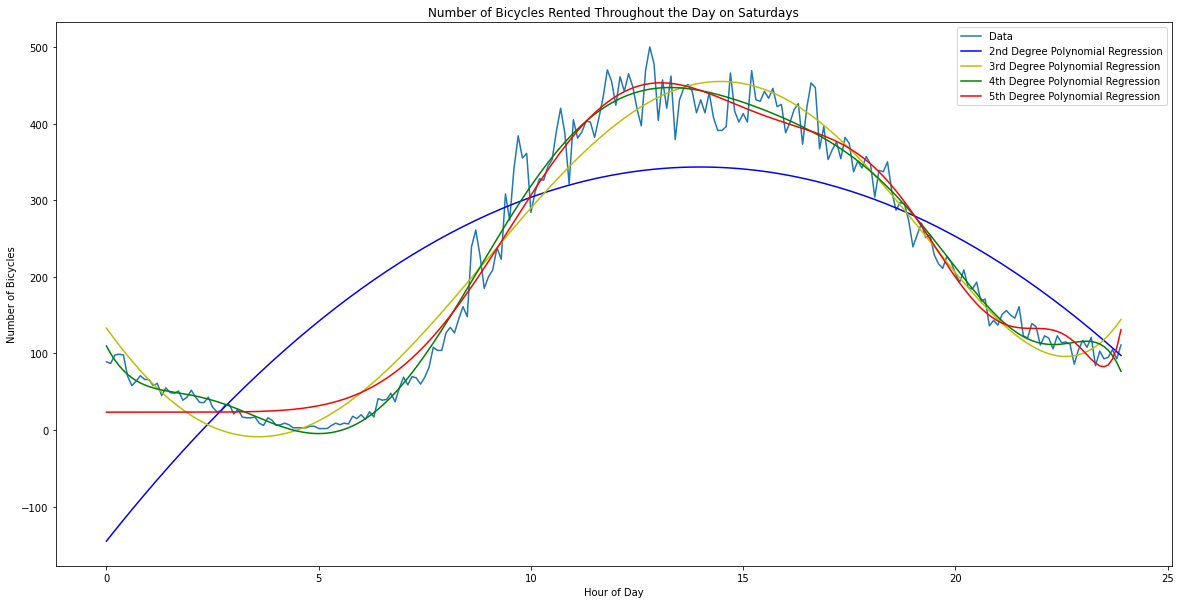

In [121]:
plt.plot(saturday.x, saturday.y, label = "Data")
plt.plot(saturday.x, np.dot(satx2, linearsat2.coef_) + linearsat2.intercept_, c='b', label = "2nd Degree Polynomial Regression")
plt.plot(saturday.x, np.dot(satx5, linearsat5.coef_) + linearsat5.intercept_, c='y', label = "3rd Degree Polynomial Regression")
plt.plot(saturday.x, np.dot(satx10, linearsat10.coef_) + linearsat10.intercept_, c='g', label = "4th Degree Polynomial Regression")
plt.plot(saturday.x, np.dot(satx15, linearsat15.coef_) + linearsat15.intercept_, c='r', label = "5th Degree Polynomial Regression")

plt.legend()

plt.title("Number of Bicycles Rented Throughout the Day on Saturdays")
plt.ylabel("Number of Bicycles")
plt.xlabel("Hour of Day")

## 3. create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values using the `monday` and `saturday` datasets.


In [62]:
# Monday Alpha .5
monridge05 = linear_model.Ridge(alpha=.5)

monridge05.fit(monx15, monday.y)

(monridge05.coef_, monridge05.intercept_)

(array([ 0.00000000e+00,  2.52928522e-01,  7.49857178e+01, -2.18931785e+02,
         4.40606024e+02, -3.04289793e+02,  1.08290521e+02, -2.34646387e+01,
         3.35526295e+00, -3.29951794e-01,  2.27197055e-02, -1.09518955e-03,
         3.62404449e-05, -7.84740550e-07,  1.00180052e-08, -5.71805404e-11]),
 -687.2801011029412)

In [63]:
# Monday Alpha .50
monridge50 = linear_model.Ridge(alpha=50)

monridge50.fit(monx15, monday.y)

(monridge50.coef_, monridge50.intercept_)

(array([ 0.00000000e+00, -3.22279887e-02, -8.20557700e+00,  3.05079090e+01,
         1.96328614e+01, -3.84018308e+01,  1.91622437e+01, -4.95866879e+00,
         7.88774699e-01, -8.29655930e-02,  5.96239362e-03, -2.95018340e-04,
         9.90049295e-06, -2.15418411e-07,  2.74291646e-09, -1.55188889e-11]),
 -270.472438139074)

In [64]:
# Monday Alpha 100
monridge100 = linear_model.Ridge(alpha=100)

monridge100.fit(monx15, monday.y)

(monridge100.coef_, monridge100.intercept_)

(array([ 0.00000000e+00, -1.08851830e-02, -7.53284041e+00,  1.82499825e+01,
         9.14606851e+00, -2.49424574e+01,  1.34331689e+01, -3.60023265e+00,
         5.82906590e-01, -6.18246902e-02,  4.45427184e-03, -2.20056289e-04,
         7.35030834e-06, -1.58758866e-07,  2.00176111e-09, -1.11883445e-11]),
 -117.35041741763843)

Text(0.5, 0, 'Hour of Day')

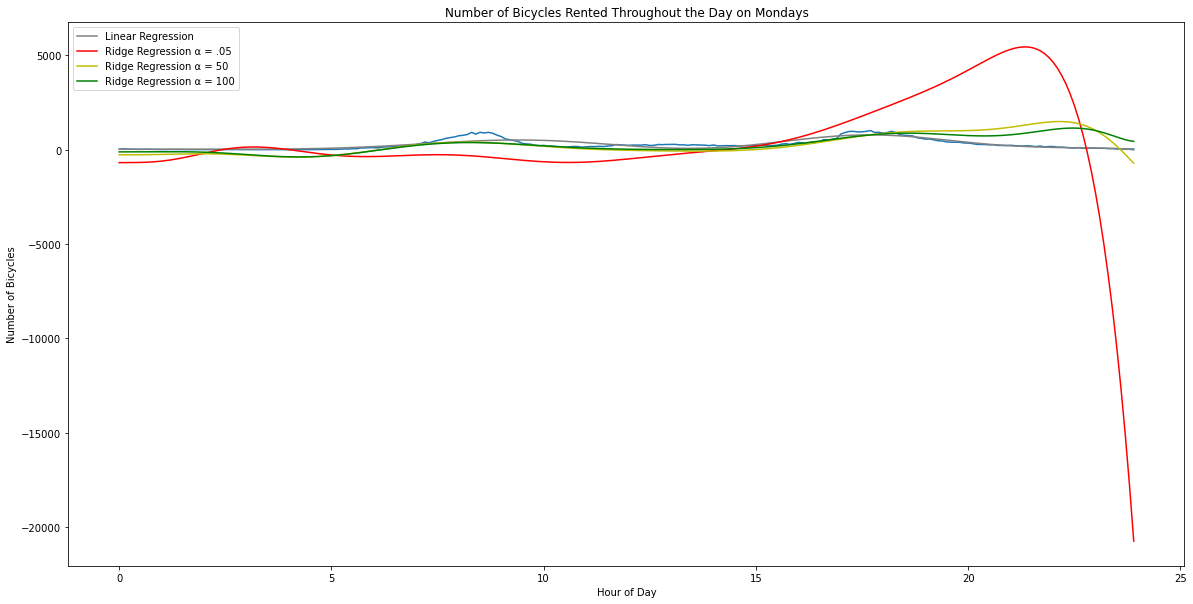

In [117]:
# Monday Alpha Plot
plt.plot(monday.x, monday.y)
plt.plot(monday.x, np.dot(monx15, linear15.coef_) + linear15.intercept_, c='grey', label = "Linear Regression")
plt.plot(monday.x, np.dot(monx15, monridge05.coef_) + monridge05.intercept_, c='r', label = "Ridge Regression ⍺ = .05")
plt.plot(monday.x, np.dot(monx15, monridge50.coef_) + monridge50.intercept_, c='y', label = "Ridge Regression ⍺ = 50")
plt.plot(monday.x, np.dot(monx15, monridge100.coef_) + monridge100.intercept_, c='g', label = "Ridge Regression ⍺ = 100")

plt.legend()

plt.title("Number of Bicycles Rented Throughout the Day on Mondays")
plt.ylabel("Number of Bicycles")
plt.xlabel("Hour of Day")


In [66]:
# Saturday Alpha .5
satridge05 = linear_model.Ridge(alpha=0.5)

satridge05.fit(satx15, saturday.y)

(satridge05.coef_, satridge05.intercept_)

(array([ 0.00000000e+00, -6.88368648e-04,  1.76047816e+00, -1.06949216e-01,
        -7.94533580e+00,  6.30512643e+00, -2.32160108e+00,  5.09087591e-01,
        -7.26612320e-02,  7.04317893e-03, -4.72730841e-04,  2.20057989e-05,
        -6.97974791e-07,  1.44039961e-08, -1.74506582e-10,  9.42459816e-13]),
 104.67001943588258)

In [67]:
# Saturday Alpha 50
satridge50 = linear_model.Ridge(alpha=50)

satridge50.fit(satx15, saturday.y)

(satridge50.coef_, satridge50.intercept_)

(array([ 0.00000000e+00,  2.11706818e-03,  8.87425195e-01, -2.14186656e+00,
        -1.24648802e+00,  1.43410443e+00, -5.68928829e-01,  1.27370526e-01,
        -1.77742816e-02,  1.60662207e-03, -9.50401486e-05,  3.60990468e-06,
        -8.21415161e-08,  8.99150186e-10,  2.46290912e-13, -6.93400528e-14]),
 90.47174941301347)

In [68]:
# Saturday Alpha 100
satridge100 = linear_model.Ridge(alpha=100)

satridge100.fit(satx15, saturday.y)

(satridge100.coef_, satridge100.intercept_)

(array([ 0.00000000e+00,  2.97889310e-03,  6.45672303e-01, -1.40276793e+00,
        -8.56583735e-01,  8.24453852e-01, -3.02238667e-01,  6.37516343e-02,
        -8.13028906e-03,  6.17807902e-04, -2.46504480e-05,  1.18825499e-07,
         3.63751149e-08, -1.72895426e-09,  3.45639967e-11, -2.69538633e-13]),
 86.50923511683942)

Text(0.5, 0, 'Hour of Day')

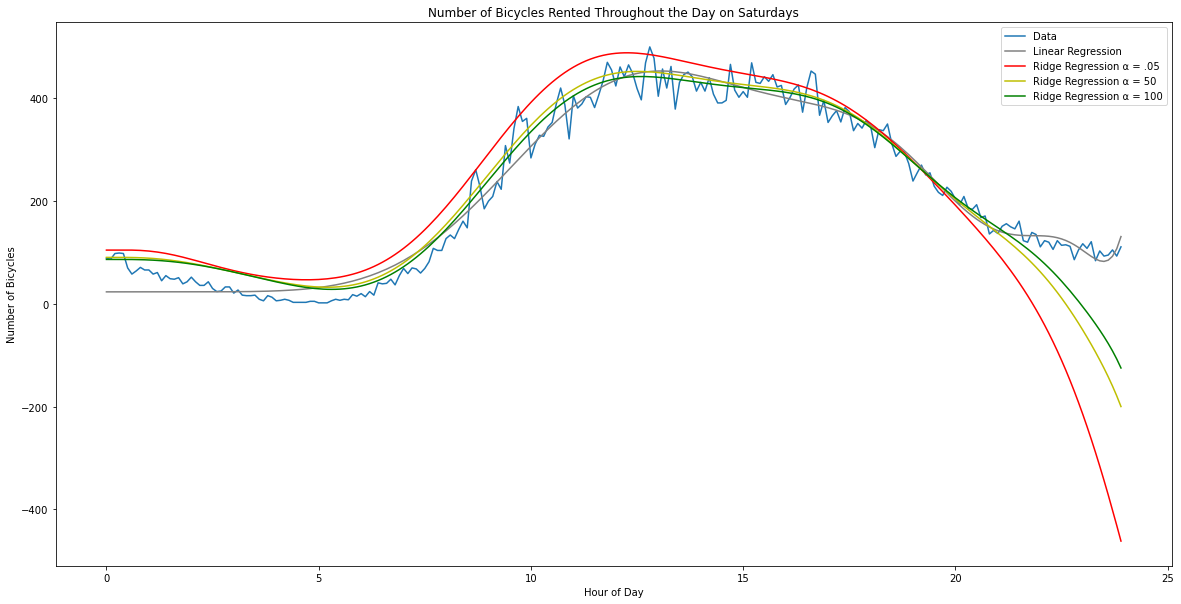

In [112]:
# Saturday Ridge Plot
plt.plot(saturday.x, saturday.y, label = "Data")
plt.plot(saturday.x, np.dot(satx15, linearsat15.coef_) + linearsat15.intercept_, c='grey', label = "Linear Regression")
plt.plot(saturday.x, np.dot(satx15, satridge05.coef_) + satridge05.intercept_, c='r', label = "Ridge Regression ⍺ = .05")
plt.plot(saturday.x, np.dot(satx15, satridge50.coef_) + satridge50.intercept_, c='y', label = "Ridge Regression ⍺ = 50")
plt.plot(saturday.x, np.dot(satx15, satridge100.coef_) + satridge100.intercept_, c='g', label = "Ridge Regression ⍺ = 100")

plt.legend()

plt.title("Number of Bicycles Rented Throughout the Day on Saturdays")
plt.ylabel("Number of Bicycles")
plt.xlabel("Hour of Day")
